In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
model_data = pd.read_csv('/kaggle/input/loan-data/Modeling dataset.csv', encoding='utf-8')

In [4]:
model_data.head()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,Current
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,Fully Paid
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,Fully Paid
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,Current
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,Fully Paid


In [5]:
model_data = model_data.drop_duplicates()
model_data = model_data.drop(columns=['id'])

In [6]:
model_data.dtypes

loan_amnt                   int64
emp_length                  int64
annual_inc                float64
delinq_2yrs                 int64
inq_last_6mths              int64
mths_since_last_delinq      int64
mths_since_last_record      int64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
earliest_cr_line           object
purpose                    object
desc                       object
loan_status                object
dtype: object

In [7]:
model_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [8]:
category_mapping = {
    'Current':1,
    'In Grace Period':1,
    'Fully Paid':1,
    'Charged Off':0,
    'Late (31-120 days)':0,
    'Late (16-30 days)':1,
    'Default':0
}
model_data['loan_status']=model_data['loan_status'].map(category_mapping)

In [9]:
model_data.describe(exclude='object')

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
count,12491.000000,12491.000000,1.249100e+04,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000
mean,11228.384437,5.047234,6.824558e+04,0.145625,0.862621,90.174366,125.910015,9.322392,0.053959,13515.845409,0.490956,22.268914,0.870787
std,7418.857146,3.363823,5.160006e+04,0.482198,1.057902,42.339998,18.985737,4.431606,0.234978,16118.261730,0.282016,11.521747,0.335449
min,500.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,2.000000,4.032000e+04,0.000000,0.000000,47.000000,130.000000,6.000000,0.000000,3752.000000,0.260000,14.000000,1.000000
50%,10000.000000,4.000000,5.900000e+04,0.000000,1.000000,120.000000,130.000000,9.000000,0.000000,8943.000000,0.500000,21.000000,1.000000
75%,15000.000000,9.000000,8.200000e+04,0.000000,1.000000,120.000000,130.000000,12.000000,0.000000,17100.000000,0.720000,29.000000,1.000000
max,35000.000000,10.000000,2.039784e+06,8.000000,8.000000,120.000000,130.000000,42.000000,4.000000,149527.000000,1.000000,81.000000,1.000000


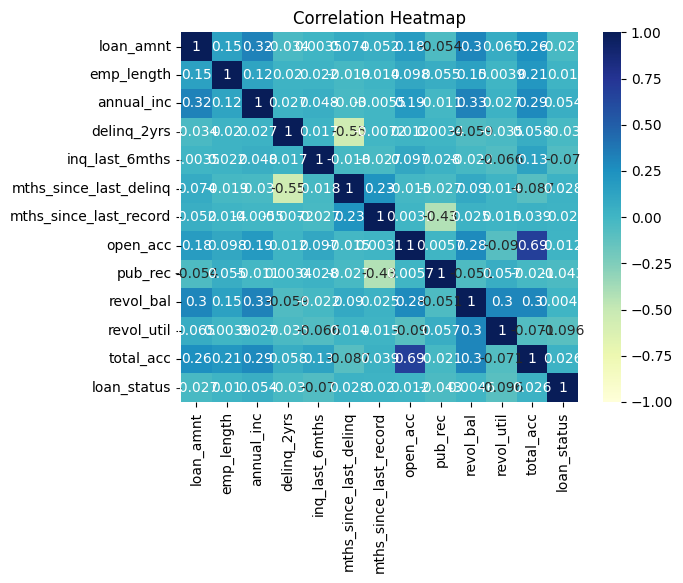

In [10]:
continuous_feat = ['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']

correlation = model_data[continuous_feat].corr()
sns.heatmap(correlation,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

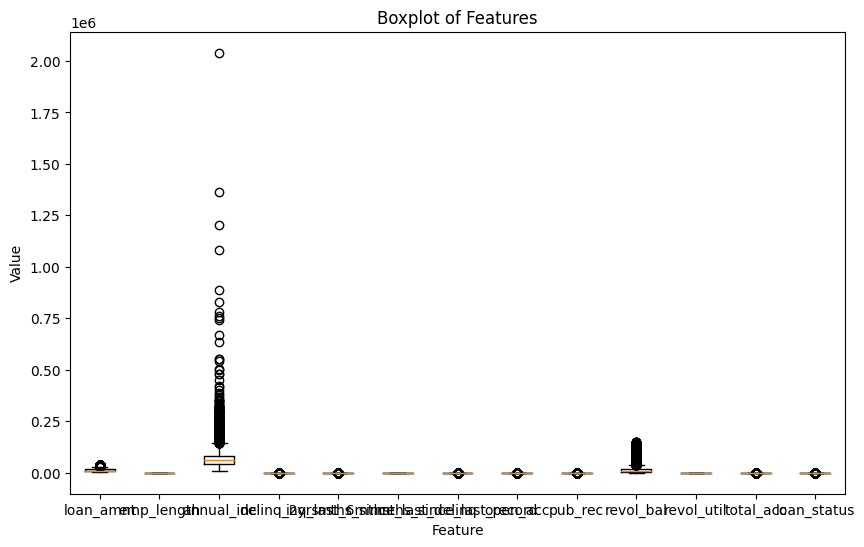

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot([model_data[col] for col in continuous_feat], labels=continuous_feat)
plt.title('Boxplot of Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()